# Punto 1
---
## Runge Kutta 2

In [1]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy import integrate

In [2]:
#Physics parameters
g = 9.81
b = 0.1    # Gamma/m  Gamma is the viscosity and m the mass 

In [3]:
h = 0.2
t = np.arange(0,20+h,h)
#t

In [4]:
def System(r,t):
    w0 = 1
    w = 0.3
    vx, vy, vz = r
    
    dvxdt = -w0*vy*np.sin(w*t)
    dvydt = w0*vx*np.sin(w*t)
    dvzdt = 0
    
    return [dvxdt,dvydt,dvzdt]

In [5]:
rx = np.zeros_like(t)
ry = np.zeros_like(t)
rz = np.zeros_like(t)

In [6]:
def Integrator2(f,r0,t):
    
    h = t[1] - t[0]
    print(h)
    
    vx = np.zeros_like(t)
    vy = np.zeros_like(t)
    vz = np.zeros_like(t)
    
    vx[0] = r0[0]
    vy[0] = r0[1]
    vz[0] = r0[2]

    rx[0] = 0
    ry[0] = 0
    rz[0] = 0
    
    K1 = np.zeros(3)
    K2 = np.zeros(3)
    
    # Las pendientes instantaneas
    R = np.zeros(4)

    for i in range(1,len(t)):
        
        R = np.array([vx[i-1],vy[i-1],vz[i-1]])
        
        K1 = f(R,t[i-1])
        
        R = np.array([vx[i-1]+h*K1[0],vy[i-1]+h*K1[1],vz[i-1]+h*K1[2]])
        
        K2 = f(R,t[i-1]+h)
        
        vx[i] = vx[i-1] + 0.5*h*(K1[0]+K2[0])
        vy[i] = vy[i-1] + 0.5*h*(K1[1]+K2[1])
        
        vz[i] = vz[i-1] + 0.5*h*(K1[2]+K2[2])
        
        rx[i] = rx[i - 1] + vx[i]*h
        ry[i] = ry[i - 1] + vy[i]*h
        rz[i] = rz[i - 1] + vz[i]*h
        
    return vx,vy,vz

In [7]:
r0 = [0.,1.,1.]

In [8]:
vx,vy,vz = Integrator2(System,r0, t)

0.2


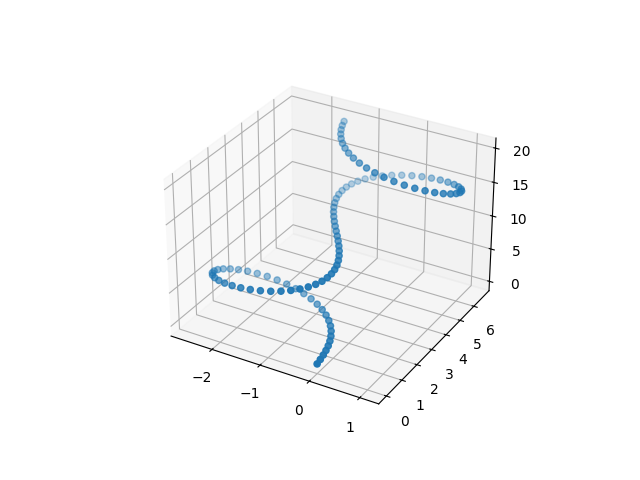

In [9]:
fig2 = plt.figure()

ax5 = fig2.add_subplot(111, projection='3d')

ax5.scatter(rx, ry, rz)

## Runge Kutta 4

In [10]:
rx = np.zeros_like(t)
ry = np.zeros_like(t)
rz = np.zeros_like(t)

def Integrator2(f,r0,t):
    
    h = t[1] - t[0]
    print(h)
    
    vx = np.zeros_like(t)
    vy = np.zeros_like(t)
    vz = np.zeros_like(t)
    
    vx[0] = r0[0]
    vy[0] = r0[1]
    vz[0] = r0[2]

    rx[0] = 0
    ry[0] = 0
    rz[0] = 0
    
    K1 = np.zeros(3)
    K2 = np.zeros(3)
    k3 = np.zeros(3)
    k4 = np.zeros(3)
    
    # Las pendientes instantaneas
    R = np.zeros(4)
    
    for i in range(1,len(t)):
        R = np.array([vx[i-1],vy[i-1],vz[i-1]])
        K1 = f(R,t[i-1])
        R = np.array([vx[i-1]+0.5*h*K1[0],vy[i-1]+0.5*h*K1[1],vz[i-1]+0.5*h*K1[2]])
        K2 = f(R,t[i-1]+0.5*h)
        R=np.array([vx[i-1]+0.5*h*K2[0],vy[i-1]+0.5*h*K2[1],vz[i-1]+0.5*h*K2[2]])
        K3=f(R,t[i-1]+0.5*h)
        R=np.array([vx[i-1]+h*K3[0],vy[i-1]+h*K3[1],vz[i-1]+h*K3[2]])
        K4=f(R,t[i-1]+h)
        vx[i] = vx[i-1] + (1/6)*h*(K1[0]+2*K2[0]+2*K3[0]+K4[0])
        vy[i] = vy[i-1] + (1/6)*h*(K1[1]+2*K2[1]+2*K3[1]+K4[1])
        vz[i] = vz[i-1] + (1/6)*h*(K1[2]+2*K2[2]+2*K3[2]+K4[2])

        rx[i] = rx[i - 1] + vx[i]*h
        ry[i] = ry[i - 1] + vy[i]*h
        rz[i] = rz[i - 1] + vz[i]*h
        
    return vx,vy,vz

In [11]:
r0 = [0.,1.,1.]

In [12]:
vx,vy,vz = Integrator2(System,r0, t)

0.2


In [13]:
r = integrate.odeint(System,r0,t)

In [14]:
plt.plot(vx,vy)
plt.plot(r[:,0],r[:,1])

In [15]:
plt.plot(t,vy)

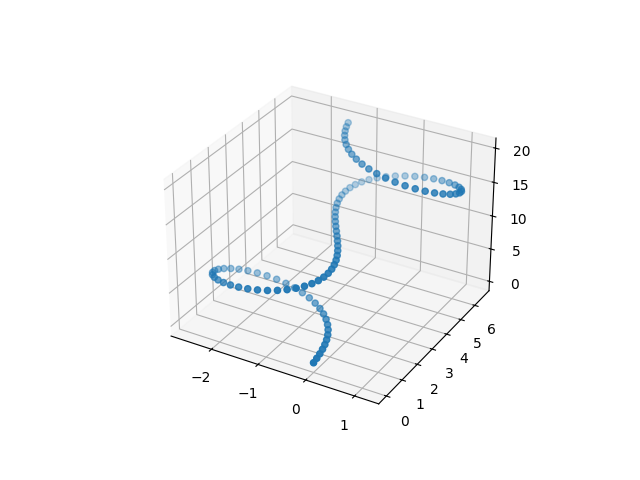

In [16]:
fig = plt.figure()

ax6 = fig.add_subplot(111,projection='3d')

ax6.scatter(rx, ry, rz)

# Mostramos el gráfico
plt.show()

---
# Punto 2
---
## Parte A)

Partiendo de la ecuación:
$$
x_{n+1} + x_{n-1} = 2x_n + a_n(x_n)h^2
$$
De lo cual se puede escribir los errores propios de cada punto:
$$
x_{n+1} + \epsilon_{n+1} + x_{n-1} + \epsilon_{n-1} = 2x_n + 2\epsilon_n + a_n(x_n + \epsilon_n)h^2
$$
Y si dejamos solo los errores queda
$$
\begin{align*}
\epsilon_{n-1}+\epsilon_{n+1}=2\epsilon_{n}+\frac{da_n}{dx}\epsilon_nh^2\\
a_n = \frac{d a_n}{dx}\\
\epsilon_{n+1}-\left(2+a_nh^2\right)\epsilon_{n}+\epsilon_{n-1} = 0
\end{align*}
$$
## Parte B)
Del punto anterior tenemos la ecuación para el error. Ademas sabemos que para un oscilador armonico $a = -\omega^2x$ por lo tanto $a' = -\omega^2$.
$$
\begin{align*}
\epsilon_{n+1}-\left(2-\omega h^2\right)\epsilon_{n}+\epsilon_{n-1} = 0\\
2R = \omega h^2\\
\epsilon_{n+1}-\left(2-2R\right)\epsilon_{n}+\epsilon_{n-1} = 0\\
\epsilon_{n+1}-2\left(1-R\right)\epsilon_{n}+\epsilon_{n-1} = 0
\end{align*}
$$
## Parte C)
Utilizando la suposición planteada en el enunciado y siguiendo con la ecuación encontrada en el punto anterior nos queda:
$$
\begin{align*}
\epsilon_{n+1}-2\left(1-R\right)\epsilon_{n}+\epsilon_{n-1} = 0\\
\epsilon_0\lambda^{n+1} - 2(1 - R)\epsilon_0\lambda^n + \epsilon_0\lambda^{n-1} = 0\\
\frac{\left(\epsilon_0\lambda^{n+1} - 2(1 - R)\epsilon_0\lambda^n + \epsilon_0\lambda^{n-1}\right)}{\epsilon_0\lambda^{n-1}} = 0\\
\lambda^2 - 2(1 - R)\lambda + 1 = 0
\end{align*}
$$
Ahora para encontrar las raices de este polinomio solo necesitamos utilizar la ecuación cuadratica. por lo tanto
$$
\begin{align*}
\frac{-b \pm \sqrt{b^2 -4ac}}{2a}\\
\frac{2(1 - R) \pm \sqrt{4\left(1-R\right)^2 - 4}}{2}\\
\lambda_{\pm} = (1 - R) \pm \sqrt{R^2 - 2R}
\end{align*}
$$
## Parte D)

En este caso podemos desarrollar:
$$
\begin{align*}
-1 \le (1 - R) \pm \sqrt{R^2 - 2R} \le 1\\
-2 + R \le \sqrt{R^2 - 2R}\le R\\
R^2 \le R^2 - 2R \le R^2 - 4R + 4\\
0 \le - 2R \le -4R+4\\
R = \frac{h^2\omega^2}{2}\\
 2\left(\frac{h^2\omega^2}{2}\right) \le -4\left(\frac{h^2\omega^2}{2}\right)+4\\
 h \le \frac{2}{\omega}
\end{align*}
$$
## Parte E)

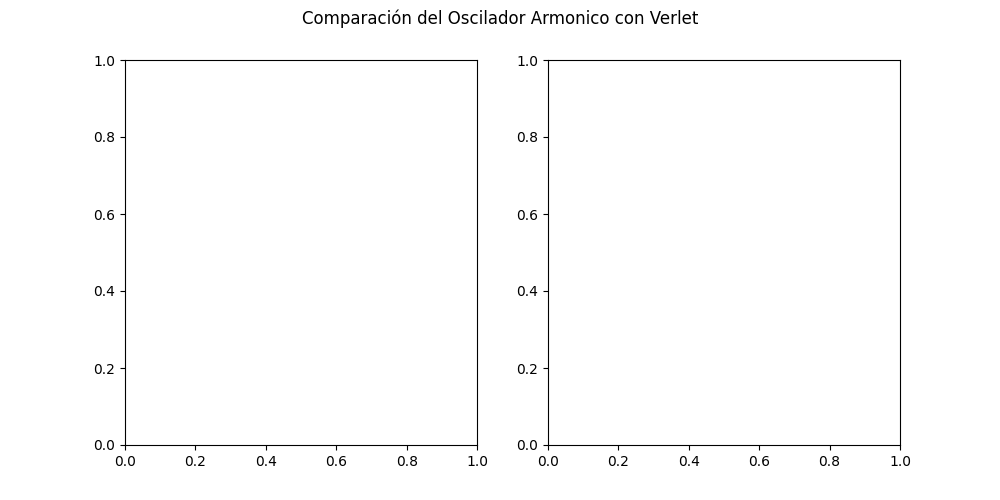

In [17]:
x0 = np.array([1., 1.])
omega=np.pi

def Verlet(x0, t, h,omega):
    t = np.arange(0, t, h)
    x_n = np.zeros_like(t)
    x_r = np.zeros_like(t)
    x_n[0] = x0[0]
    
    for i in range(0, len(t)-1):
        if i == 0:
            x_n[i + 1] = x_n[i] + h*(x0[1] + h*(-(omega**2) * x_n[i]))
        else:
            x_n[i + 1] = 2*x_n[i] - x_n[i - 1] + (-(omega**2) * x_n[i])*(h**2)
            
        x_r[i]=np.cos(omega*t[i]) + ((np.sin(omega*t[i]))/omega)
    return x_n,x_r,t

x_stable,x_analitic_sta,t_stable = Verlet(x0, 25, 0.1,omega)
x_nstable,x_nanalitic_sta,t_nstable = Verlet(x0, 25, 0.65,omega)

figa = plt.figure(figsize = (10, 5))
figa.suptitle('Comparación del Oscilador Armonico con Verlet')
ax3 = figa.add_subplot(121)
ax4 = figa.add_subplot(122)
scale = 1
    
def Update(i):
    ax3.plot(t_stable[::scale][:i], x_stable[::scale][:i], color = 'm')
    ax3.plot(t_stable[::scale][:i], x_analitic_sta[::scale][:i], color = 'y')
    
    ax4.plot(t_nstable[::scale][:i], x_nstable[::scale][:i], color = 'm')
    ax4.plot(t_nstable[::scale][:i], x_nanalitic_sta[::scale][:i], color = 'y')
        
    if i <= len(t_stable) - 1:
        ax3.plot(t_stable[::scale], x_stable[::scale], color = 'm') 
        ax3.plot(t_stable[::scale], x_analitic_sta[::scale], color = 'y')
        ax4.plot(t_nstable[::scale], x_nstable[::scale], color = 'm')
        ax4.plot(t_nstable[::scale], x_nanalitic_sta[::scale], color = 'y')
        
Animation = FuncAnimation(figa, Update, frames = len(t_stable), repeat = True)

---
# Punto 3
---
Partiendo de $x^3y'=x^4y^2-2x^2y - 1$ podemos despejar para que quede: $y' = xy^2 - 2\frac{y}{x} - \frac{1}{x^3}$
$$
\begin{align*}
y(x) = y_1(x) + \frac{1}{u(x)}= \frac{1}{x^2}+\frac{1}{u(x)}\\
\frac{d y}{d x} = x \left(\frac{1}{x^2}\right)^2 - \frac{2}{x}\left(\frac{1}{x^2}\right)-\frac{1}{x^3}\\
= -\frac{2}{x^3} - \frac{1}{u^2}\frac{du}{dx} 
\end{align*}
$$

Por lo tanto
$$
\begin{align*}
\frac{dy}{dx} = xy^2-\frac{2}{x}y - \frac{1}{x^3}y - \frac{1}{x^3}\\
\frac{1}{u^2}\frac{du}{dx}=-xy^2+\frac{2}{x}y-\frac{1}{x^3}
\end{align*}
$$

Dado que conocemos una solución podemos encontrar una nueva expresión que sea basicamente una ecuación diferencial de primer orden.
$$
\begin{align*}
\frac{1}{u^2}\frac{du}{dx} &= -x \left(\frac{1}{x^2} + \frac{1}{u}\right)^2+\frac{2}{x}\left(\frac{1}{x^2} + \frac{1}{u}\right)- \frac{1}{x^3}\\
&= -x \left(\frac{1}{x^4} +\frac{2}{x^2u}+ \frac{1}{u^2}\right)+\frac{2}{x}\left(\frac{1}{x^2} + \frac{1}{u}\right)- \frac{1}{x^3}\\
&= -\frac{1}{x^3} - \frac{2}{xu} - \frac{x}{u^2} + \frac{2}{x^3} + \frac{2}{xu} - \frac{1}{x^3}\\
\frac{du}{dx} &= x\\
u(x) &= \frac{x^2}{2} + C\\
y(x) &= y_1(x)+\frac{1}{u(x)}=\frac{1}{x^2}+ \left(-\frac{x^2}{2}+C\right)^{-1}
\end{align*}
$$
Ya con esto, solo nos queda aplicar las condiciones iniciales para encontra $C$.
$$
y(\sqrt{2}) = \frac{1}{\sqrt{2}} + \left(-\frac{(\sqrt{2}^2}{2}+C\right)^{-1} = 0
$$
con lo cual queda:
$$
-\frac{1}{2} = -\left(1+C\right)^{-1}  \implies C = 1
$$

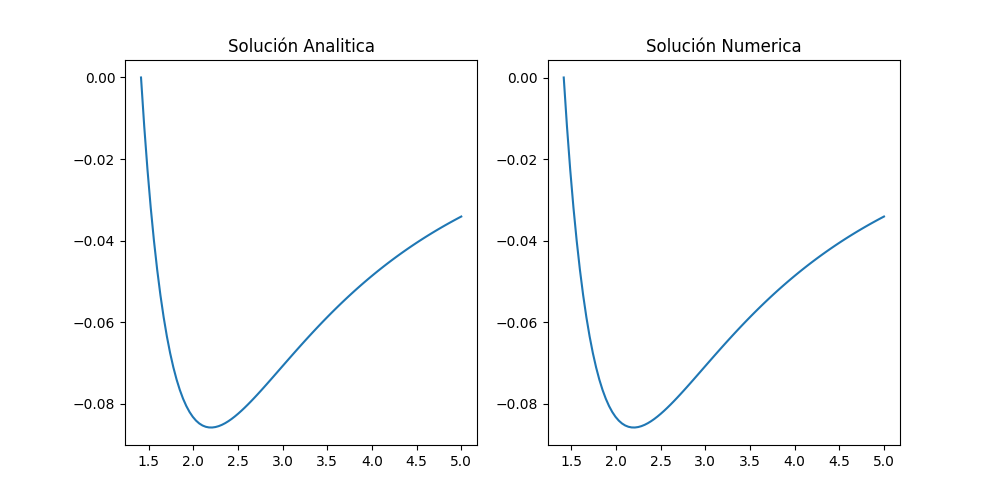

In [18]:
def f(x,y):
    return (x*y**2)-(2/x)*y-(1/(x**3))
def y(x):
    return (1/x**2) - ((x**2/2)+1)**(-1)
t = np.linspace(np.sqrt(2), 5, 100)
ysol = y(t)
h = t[1] - t[0]

def RungeKutta(x,y,h,g):
    y[0] = 0
    
    for i in range(1,len(x)):
        
        k1 = g(x[i-1],y[i-1])
        k2 = g(x[i-1]+0.5*h,y[i-1] + 0.5*h*k1)
        k3 = g(x[i-1]+0.5*h,y[i-1] + 0.5*h*k2)
        k4 = g(x[i-1]+h,y[i-1]+k3*h)
        
        y[i] = y[i-1] + (h/6)*(k1+2*k2+2*k3+k4)
        
    return y
y = np.zeros_like(t)
y = RungeKutta(t,y,h,f)

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(t, ysol)
ax1.set_title("Solución Analitica")
ax2.plot(t, y)
ax2.set_title("Solución Numerica")

plt.show()